In [256]:
import pandas as pd 
import geopandas as gpd 

seoul_gpd = gpd.read_file("eda/data/seoul_sig.geojson")
seoul_gpd.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"MULTIPOLYGON (((956615.45324 1953567.19897, 95..."
1,11140,Jung-gu,중구,"MULTIPOLYGON (((957890.38568 1952616.74557, 95..."
2,11170,Yongsan-gu,용산구,"MULTIPOLYGON (((953115.76109 1950834.08363, 95..."
3,11200,Seongdong-gu,성동구,"MULTIPOLYGON (((959681.10939 1952649.60480, 95..."
4,11215,Gwangjin-gu,광진구,"MULTIPOLYGON (((964825.05795 1952633.24962, 96..."


In [257]:
seoul_gpd = seoul_gpd.set_crs(epsg='5178', allow_override=True)
seoul_gpd.to_crs(epsg='4326').head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"MULTIPOLYGON (((127.00648 37.58322, 127.00655 ..."
1,11140,Jung-gu,중구,"MULTIPOLYGON (((127.02098 37.57471, 127.02120 ..."
2,11170,Yongsan-gu,용산구,"MULTIPOLYGON (((126.96702 37.55841, 126.96701 ..."
3,11200,Seongdong-gu,성동구,"MULTIPOLYGON (((127.04125 37.57509, 127.04308 ..."
4,11215,Gwangjin-gu,광진구,"MULTIPOLYGON (((127.09951 37.57515, 127.10008 ..."


In [258]:
seoul_gpd = seoul_gpd.set_crs(epsg='5178', allow_override=True)
seoul_gpd['center_point'] = seoul_gpd['geometry'].geometry.centroid
seoul_gpd['geometry'] = seoul_gpd['geometry'].to_crs(epsg=4326)
seoul_gpd['center_point'] = seoul_gpd['center_point'].to_crs(epsg=4326)
seoul_gpd['경도'] = seoul_gpd['center_point'].map(lambda x: x.xy[0][0])
seoul_gpd['위도'] = seoul_gpd['center_point'].map(lambda x: x.xy[1][0])
seoul_gpd.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,center_point,경도,위도
0,11110,Jongno-gu,종로구,"MULTIPOLYGON (((127.00648 37.58322, 127.00655 ...",POINT (126.97516 37.59767),126.975159,37.597667
1,11140,Jung-gu,중구,"MULTIPOLYGON (((127.02098 37.57471, 127.02120 ...",POINT (126.99381 37.56289),126.993806,37.562893
2,11170,Yongsan-gu,용산구,"MULTIPOLYGON (((126.96702 37.55841, 126.96701 ...",POINT (126.97775 37.53413),126.977745,37.534135
3,11200,Seongdong-gu,성동구,"MULTIPOLYGON (((127.04125 37.57509, 127.04308 ...",POINT (127.03890 37.55378),127.038898,37.553780
4,11215,Gwangjin-gu,광진구,"MULTIPOLYGON (((127.09951 37.57515, 127.10008 ...",POINT (127.08359 37.54947),127.083585,37.549471


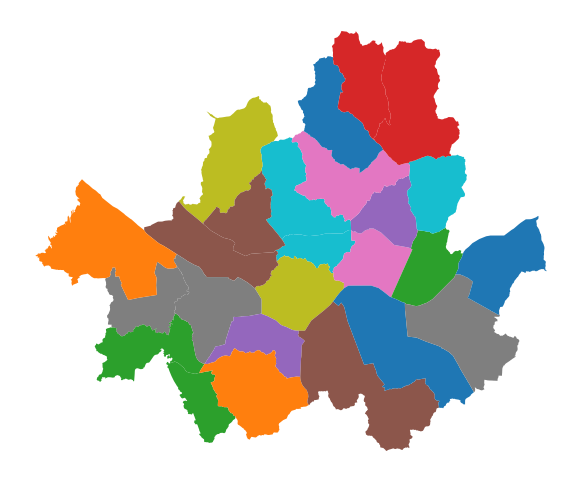

In [259]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
seoul_gpd.plot(column='SIG_KOR_NM', ax=ax)
plt.axis('off')
plt.savefig('output/map01.png', dpi=200)
plt.show()

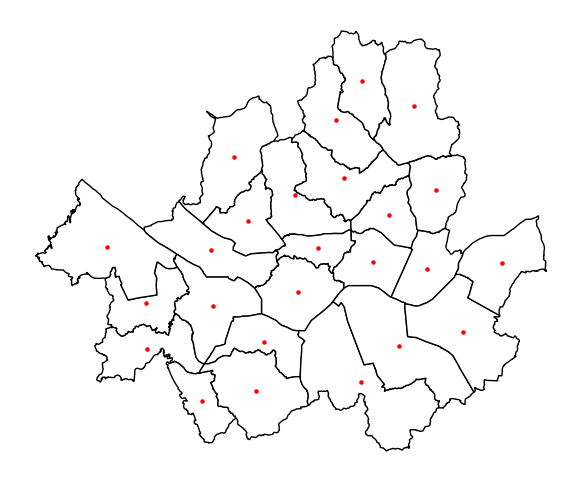

In [260]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
seoul_gpd.plot(ax=ax, color='white', edgecolor='black')
seoul_gpd['center_point'].plot(marker='o', color='red', markersize=5, ax=ax)
plt.axis('off')
plt.savefig('output/map02.png', dpi=200)
plt.show()

In [261]:
import pandas as pd
seoul = pd.read_csv("data/seoul_real_estate.csv", parse_dates=['DEAL_YMD'])
seoul['month'] = seoul['DEAL_YMD'].dt.month
seoul = seoul[(seoul['HOUSE_TYPE'] == '아파트') & (seoul['month'].isin([3, 4]))]
seoul = seoul[['DEAL_YMD', 'month', 'SGG_CD', 'SGG_NM', 'OBJ_AMT', 'HOUSE_TYPE']].reset_index(drop=True)
seoul.head()

,DEAL_YMD,month,SGG_CD,SGG_NM,OBJ_AMT,HOUSE_TYPE
0,2023-04-30,4,11440,마포구,143000,아파트
1,2023-04-30,4,11290,성북구,72500,아파트
2,2023-04-30,4,11140,중구,66579,아파트
3,2023-04-30,4,11410,서대문구,83300,아파트
4,2023-04-29,4,11560,영등포구,100000,아파트


In [262]:
summary_df = seoul.groupby(['SGG_CD', 'month'])['OBJ_AMT'].agg(['mean', 'std', 'size']).reset_index()
summary_df.head(4)

,SGG_CD,month,mean,std,size
0,11110,3,133339.500000,73164.283383,20
1,11110,4,111864.285714,80406.128805,14
2,11140,3,92777.096774,55285.404294,31
3,11140,4,76187.319149,38750.060463,47


In [263]:
seoul_gpd.head(3)

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,center_point,경도,위도
0,11110,Jongno-gu,종로구,"MULTIPOLYGON (((127.00648 37.58322, 127.00655 ...",POINT (126.97516 37.59767),126.975159,37.597667
1,11140,Jung-gu,중구,"MULTIPOLYGON (((127.02098 37.57471, 127.02120 ...",POINT (126.99381 37.56289),126.993806,37.562893
2,11170,Yongsan-gu,용산구,"MULTIPOLYGON (((126.96702 37.55841, 126.96701 ...",POINT (126.97775 37.53413),126.977745,37.534135


In [264]:
seoul_gpd = seoul_gpd.rename(columns={"SIG_CD" : "SGG_CD"})
seoul_gpd.head(1)

,SGG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,center_point,경도,위도
0,11110,Jongno-gu,종로구,"MULTIPOLYGON (((127.00648 37.58322, 127.00655 ...",POINT (126.97516 37.59767),126.975159,37.597667


In [265]:
summary_df['SGG_CD'] = summary_df['SGG_CD'].astype(str)
merge_df = seoul_gpd.merge(summary_df, on='SGG_CD')
merge_df.head(3)

,SGG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,center_point,경도,위도,month,mean,std,size
0,11110,Jongno-gu,종로구,"MULTIPOLYGON (((127.00648 37.58322, 127.00655 ...",POINT (126.97516 37.59767),126.975159,37.597667,3,133339.500000,73164.283383,20
1,11110,Jongno-gu,종로구,"MULTIPOLYGON (((127.00648 37.58322, 127.00655 ...",POINT (126.97516 37.59767),126.975159,37.597667,4,111864.285714,80406.128805,14
2,11140,Jung-gu,중구,"MULTIPOLYGON (((127.02098 37.57471, 127.02120 ...",POINT (126.99381 37.56289),126.993806,37.562893,3,92777.096774,55285.404294,31


In [266]:
merge_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   SGG_CD        50 non-null     object  
 1   SIG_ENG_NM    50 non-null     object  
 2   SIG_KOR_NM    50 non-null     object  
 3   geometry      50 non-null     geometry
 4   center_point  50 non-null     geometry
 5   경도            50 non-null     float64 
 6   위도            50 non-null     float64 
 7   month         50 non-null     int64   
 8   mean          50 non-null     float64 
 9   std           50 non-null     float64 
 10  size          50 non-null     int64   
dtypes: float64(4), geometry(2), int64(2), object(3)
memory usage: 4.7+ KB


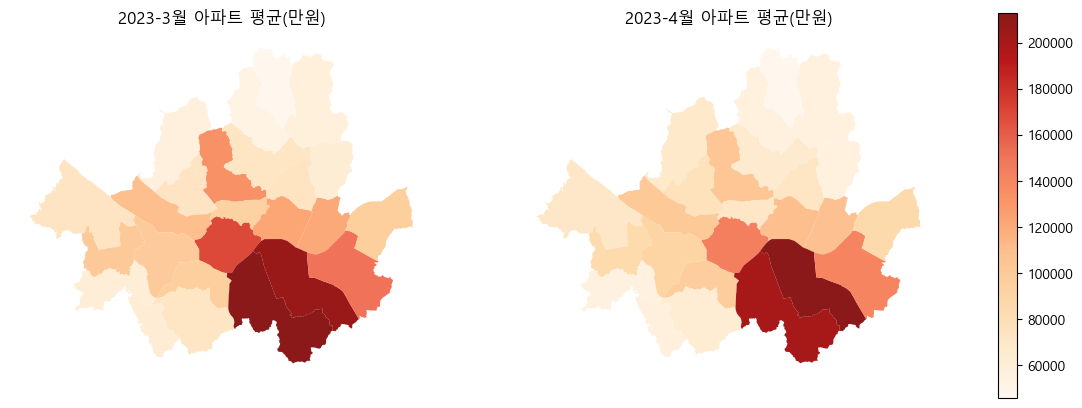

In [268]:
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(15,10)) 
merge_df[merge_df['month'] == 3].plot(ax=ax[0], column="mean", cmap="OrRd", legend=False, alpha=0.9)
merge_df[merge_df['month'] == 4].plot(ax=ax[1], column="mean", cmap="OrRd", legend=False, alpha=0.9)

patch_col = ax[0].collections[0]
cb = fig.colorbar(patch_col, ax=ax, shrink=0.5)
ax[0].set_title('2023-3월 아파트 평균(만원)')
ax[1].set_title('2023-4월 아파트 평균(만원)')
ax[0].set_axis_off()
ax[1].set_axis_off()

plt.savefig('output/map03.png', dpi=200)
plt.show()